In [1]:
import os
import sys
import json
import bilby
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import utils
%load_ext autoreload
%autoreload 2

In [3]:
# from utils.corner2d import (
#     initialize_figure_for_corner2d,
#     finalize_figure_for_corner2d,
#     plot_corner2d, plot_hist2d, plot_hist,
#     plot_square_minus_circle_noedge,
#     plot_theories_z12, plot_theories_spectral,
#     annotate_theories_z12, annotate_theories_spectral,
#     get_pn_label_from_ppe_index, get_lines_for_legend,
# )

# def plot_edgb_z12(
#         z1_data, z2_data, z1lo_data, z2lo_data, 
#         z1_range=None, z2_range=None, z1lo_range=None, z2lo_range=None,
#         z1_truth=None, z2_truth=None, z1lo_truth=None, z2lo_truth=None,
#         z1_label=r'$z_1$', z2_label=r'$z_2$',
#         bins=30, levels=[0.5,0.9], quantiles=[0.05,0.95], 
#         label='NPE full', lo_label='NPE leading', 
#         color='C0', lo_color='C2', shade_color='lightgray',
#         truth_color='black', lo_truth_color='black', 
#         truth_marker='^', lo_truth_marker='v', 
#         truth_marker_size=100, lo_truth_marker_size=100,
#         ppe_grid_thetas=[], ppe_grid_indices=[],
#         ppe_result_cis=[], ppe_result_indices=[], ppe_annotation_indices=[],
#         lo_ppe_result_cis=[], lo_ppe_result_indices=[], lo_ppe_annotation_indices=[],):

# def plot_edgb_z12(
#         z1_data, z2_data, zmax=1.,
#         z1_range=None, z2_range=None, 
#         z1_truth=None, z2_truth=None,
#         z1_label=r'$z_1$', z2_label=r'$z_2$', 
#         bins=30, levels=[0.5,0.9], quantiles=[0.05,0.95],
#         label='NPE', color='C0', truth_color='black', shade_color='lightgray', 
#         ppe_grid_thetas=[], ppe_grid_indices=[], 
#         ppe_result_cis=[], ppe_result_indices=[], ppe_annotation_indices=[],
#         ppe_label='PPE', ppe_color='C1', grid_color='gray', annotation_anchor=1., 
#         fig=None, subplots_ratio=1., subplots_space=None):

#     fig = plot_corner2d(
#             z1_data, z2_data, 
#             x_truth=z1_truth, y_truth=z2_truth,
#             x_range=z1_range, y_range=z2_range,
#             x_label=z1_label, y_label=z2_label,
#             bins=bins, levels=levels, quantiles=quantiles,
#             fig=fig, subplots_ratio=subplots_ratio, subplots_space=subplots_space,
#             color=color, truth_color=truth_color)
#     fig.axes[2].axhline(0., color=truth_color, linestyle='dashed')
#     fig.axes[2].axvline(0., color=truth_color, linestyle='dashed')
#     fig.axes[3].axhline(0., color=truth_color, linestyle='dashed')
#     fig.axes[0].axvline(0., color=truth_color, linestyle='dashed')
#     xlim = fig.axes[2].get_xlim()
#     ylim = fig.axes[2].get_ylim()
#     xcent = 0.5 * (xlim[1]+xlim[0])
#     ycent = 0.5 * (ylim[1]+ylim[0])
#     width = max(xlim[1]-xlim[0], ylim[1]-ylim[0])
#     xlim = xcent-width/2, xcent+width/2
#     ylim = ycent-width/2, ycent+width/2
#     fig.axes[2].set_xlim(xlim)
#     fig.axes[2].set_ylim(ylim)
#     fig.axes[0].set_xlim(xlim)
#     fig.axes[3].set_ylim(ylim)
    
#     ppe_grid_thetas = np.asarray(ppe_grid_thetas)
#     mask_result = [(b in set(ppe_result_indices)) for b in ppe_grid_indices]
#     mask_annotation = [(b in set(ppe_annotation_indices)) for b in ppe_grid_indices]
#     plot_theories_z12(
#             ppe_grid_thetas, 
#             ax=fig.axes[2], color=grid_color, linestyle='dotted')
#     plot_theories_z12(
#             ppe_grid_thetas[mask_result], ranges=ppe_result_cis, 
#             ax=fig.axes[2], color=ppe_color, linewidth=1.5*plt.rcParams['lines.linewidth'])
#     plot_square_minus_circle_noedge(
#             ax=fig.axes[2], width=zmax*4., ratio=0.5, color=shade_color, zorder=2)
#     annotate_theories_z12(
#             ppe_grid_thetas[mask_annotation], 
#             ppe_grid_indices[mask_annotation], 
#             label_transformer=get_pn_label_from_b,
#             ax=fig.axes[2], anchors=annotation_anchor, va='baseline', ha='right',
#             fontsize=plt.rcParams['legend.fontsize'])
    
#     lines = get_lines_for_legend(colors=[color, ppe_color])
#     fig.axes[1].legend(lines, [label, ppe_label], loc='center')
    
#     return fig


# def plot_deviation_example_spectral(
#         za_data, zb_data, 
#         za_range=None, zb_range=None,
#         za_truth=None, zb_truth=None,
#         za_label=r'$\varphi$', zb_label=r'$z_b$', 
#         bins=30, levels=[0.5,0.9], quantiles=[0.05,0.95],
#         label='NPE', color='C0', truth_color='black', shade_color='lightgray', 
#         ppe_grid_angs=[], ppe_grid_indices=[], 
#         ppe_result_cis=[], ppe_result_indices=[], ppe_annotation_indices=[],
#         ppe_label='PPE', ppe_color='C1', grid_color='gray', annotation_anchor=1., 
#         fig=None, subplots_ratio=1., subplots_space=None):

#     fig = plot_corner2d(
#             za_data, zb_data, 
#             x_truth=za_truth, y_truth=zb_truth,
#             x_range=za_range, y_range=zb_range,
#             x_label=za_label, y_label=zb_label,
#             bins=bins, levels=levels, quantiles=quantiles,
#             fig=fig, subplots_ratio=subplots_ratio, subplots_space=subplots_space,
#             color=color, truth_color=truth_color)
#     fig.axes[2].axhline(0., color=truth_color, linestyle='dashed')
#     fig.axes[3].axhline(0., color=truth_color, linestyle='dashed')
    
#     ppe_grid_angs = np.asarray(ppe_grid_angs)
#     mask_result = [(b in set(ppe_result_indices)) for b in ppe_grid_indices]
#     mask_annotation = [(b in set(ppe_annotation_indices)) for b in ppe_grid_indices]
#     plot_theories_spectral(
#             ppe_grid_angs, 
#             ax=fig.axes[2], color=grid_color, linestyle='dotted')
#     plot_theories_spectral(
#             ppe_grid_angs, 
#             ax=fig.axes[0], color=grid_color, linestyle='dotted')
#     plot_theories_spectral(
#             ppe_grid_angs[mask_result], ranges=ppe_result_cis, 
#             ax=fig.axes[2], color=ppe_color, linewidth=1.5*plt.rcParams['lines.linewidth'])
#     annotate_theories_spectral(
#             ppe_grid_angs[mask_annotation], 
#             ppe_grid_indices[mask_annotation],
#             label_transformer=get_pn_label_from_b,
#             ax=fig.axes[2], anchors=annotation_anchor, va='baseline', ha='right',
#             fontsize=plt.rcParams['legend.fontsize'])
#     ang_min = mask_annotation
    
#     lines = get_lines_for_legend(colors=[color, ppe_color])
#     fig.axes[1].legend(lines, [label, ppe_label], loc='center')
    
#     return fig


# def get_pn_label_from_b(b):
#     twice_pn = int(b) + 5
#     if twice_pn % 2:
#         label = f'${twice_pn/2:0.1f}$PN'
#     else:
#         label = f'${twice_pn//2:d}$PN'
#     return label

<AxesSubplot: >

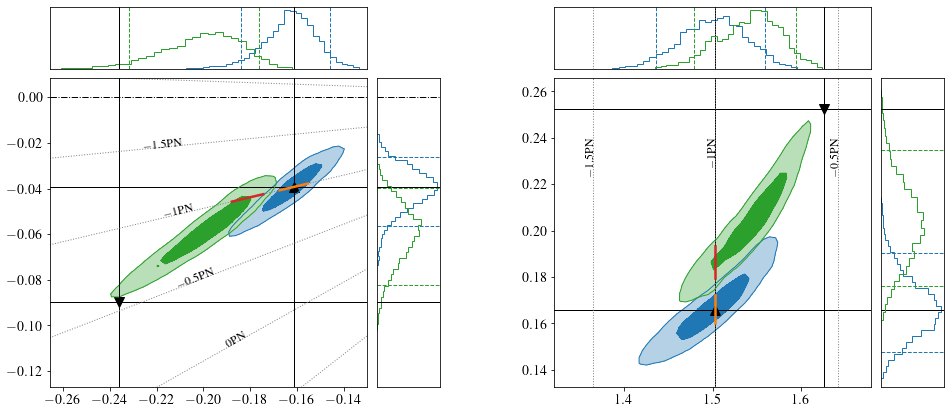

In [4]:
# theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
# root_posteriors = "../data/bilby_results/posteriors/"
# root_injections = "../data/bilby_results/injections/"

# plt.style.use('publication.mplstyle')
# fig = plt.figure(figsize=(
#         utils.TEXT_WIDTH_PRD_DOUBLE*2,
#         utils.TEXT_WIDTH_PRD_DOUBLE))
# subfigs = fig.subfigures(1, 2)

# run_name = "mtot15_edgb_sqrta2p5"
# post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_bn7.csv"), index_col=0)
# with open(os.path.join(root_injections, run_name+"_bn7.json"), 'r') as f:
#     inj = bilby.utils.io.recursively_decode_bilby_json(json.load(f))

# sf = subfigs[0]
# post = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
# plot_corner2d(
#         post['z_1'].values, post['z_2'].values,
#         x_range=0.995, y_range=0.995, bins=30,
#         x_truth=inj['z_1'], y_truth=inj['z_2'],
#         color='C0', truth_color='black',
#         truth_marker='^', truth_marker_size=100,
#         fig=sf, initialize_fig=True, finalize_fig=False, 
#         subplots_ratio=5., subplots_space=0.05)
# sf = subfigs[1]
# post = pd.read_csv(os.path.join(root_posteriors, run_name+"_zpolar.csv"), index_col=0)
# plot_corner2d(
#         post['z_ang'].values, post['z_bilat'].values,
#         x_range=0.995, y_range=0.995, bins=30,
#         x_truth=inj['z_ang'], y_truth=inj['z_bilat'],
#         color='C0', truth_color='black', 
#         truth_marker='^', truth_marker_size=100,
#         fig=sf, initialize_fig=True, finalize_fig=False, 
#         subplots_ratio=5., subplots_space=0.05)

# run_name = "mtot15_edgb_sqrta2p5_nnlo"
# post = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
# post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_bn7.csv"), index_col=0)
# with open(os.path.join(root_injections, run_name+"_bn7.json"), 'r') as f:
#     inj = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
    
# sf = subfigs[0]
# plot_corner2d(
#         post['z_1'].values, post['z_2'].values,
#         x_range=0.995, y_range=0.995, bins=30,
#         x_truth=inj['z_1'], y_truth=inj['z_2'],
#         color='C2', truth_color='black', 
#         truth_marker='v', truth_marker_size=100,
#         fig=sf, initialize_fig=False, finalize_fig=True)
# sf = subfigs[1]
# post = pd.read_csv(os.path.join(root_posteriors, run_name+"_zpolar.csv"), index_col=0)
# plot_corner2d(
#         post['z_ang'].values, post['z_bilat'].values,
#         x_range=0.995, y_range=0.995, bins=30,
#         x_truth=inj['z_ang'], y_truth=inj['z_bilat'],
#         color='C2', truth_color='black', 
#         truth_marker='v', truth_marker_size=100,
#         fig=sf, initialize_fig=False, finalize_fig=True)

# def square_corner2d(fig):
#     fig.axes[2].axhline(0., color='black', linestyle='dashdot')
#     fig.axes[2].axvline(0., color='black', linestyle='dashdot')
#     fig.axes[3].axhline(0., color='black', linestyle='dashdot')
#     fig.axes[0].axvline(0., color='black', linestyle='dashdot')
#     xlim = fig.axes[2].get_xlim()
#     ylim = fig.axes[2].get_ylim()
#     xcent = 0.5 * (xlim[1]+xlim[0])
#     ycent = 0.5 * (ylim[1]+ylim[0])
#     width = max(xlim[1]-xlim[0], ylim[1]-ylim[0])
#     xlim = xcent-width/2, xcent+width/2
#     ylim = ycent-width/2, ycent+width/2
#     fig.axes[2].set_xlim(xlim)
#     fig.axes[2].set_ylim(ylim)
#     fig.axes[0].set_xlim(xlim)
#     fig.axes[3].set_ylim(ylim)
#     return fig
# square_corner2d(subfigs[0])

# ppe_grid_indices = theory_angles['b'].values
# ppe_grid_thetas = theory_angles['z_theta'].values
# ppe_grid_angs = theory_angles['z_ang'].values
# ppe_grid_thetas = np.asarray(ppe_grid_thetas)
# ppe_grid_angs = np.asarray(ppe_grid_angs)

# sf = subfigs[0]
# plot_theories_z12(
#         ppe_grid_thetas, 
#         ax=sf.axes[2], color='gray', linestyle='dotted')
# annotation_anchor = 0.21
# ppe_annotation_indices = [-8, -7, -6, -5]
# mask_annotation = [(b in set(ppe_annotation_indices)) for b in ppe_grid_indices]
# annotate_theories_z12(
#         ppe_grid_thetas[mask_annotation], 
#         ppe_grid_indices[mask_annotation], 
#         label_transformer=get_pn_label_from_b,
#         ax=sf.axes[2], anchors=annotation_anchor, va='baseline', ha='right',
#         fontsize=plt.rcParams['legend.fontsize'])

# sf = subfigs[1]
# plot_theories_spectral(
#         ppe_grid_angs, 
#         ax=sf.axes[2], color='gray', linestyle='dotted')
# plot_theories_spectral(
#         ppe_grid_angs, 
#         ax=sf.axes[0], color='gray', linestyle='dotted')
# annotation_anchor = 0.24
# ppe_annotation_indices = [-8, -7, -6]
# mask_annotation = [(b in set(ppe_annotation_indices)) for b in ppe_grid_indices]
# annotate_theories_spectral(
#         ppe_grid_angs[mask_annotation], 
#         ppe_grid_indices[mask_annotation], 
#         label_transformer=get_pn_label_from_b,
#         ax=sf.axes[2], anchors=annotation_anchor, va='baseline', ha='right',
#         fontsize=plt.rcParams['legend.fontsize'])
# sf.axes[2].set_xlim(1.32, 1.68)
# sf.axes[0].set_xlim(sf.axes[2].get_xlim())


# ppe_result_indices = [-7]
# run_name = "mtot15_edgb_sqrta2p5"
# post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_bn7.csv"), index_col=0)
# mask_result = [(b in set(ppe_result_indices)) for b in ppe_grid_indices]
# sf = subfigs[0]
# plot_theories_z12(
#     ppe_grid_thetas[mask_result], [np.quantile(post_ppe['z_bilat'].values, [0.05,0.95])],
#     ax=sf.axes[2], color='C1', linewidth=2.5*plt.rcParams['lines.linewidth'])
# sf = subfigs[1]
# plot_theories_spectral(
#     ppe_grid_angs[mask_result], [np.quantile(post_ppe['z_bilat'].values, [0.05,0.95])],
#     ax=sf.axes[2], color='C1', linewidth=2.5*plt.rcParams['lines.linewidth'])

# run_name = "mtot15_edgb_sqrta2p5_nnlo"
# post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_bn7.csv"), index_col=0)
# mask_result = [(b in set(ppe_result_indices)) for b in ppe_grid_indices]
# sf = subfigs[0]
# plot_theories_z12(
#     ppe_grid_thetas[mask_result], [np.quantile(post_ppe['z_bilat'].values, [0.05,0.95])],
#     ax=sf.axes[2], color='C3', linewidth=2.5*plt.rcParams['lines.linewidth'])
# sf = subfigs[1]
# plot_theories_spectral(
#     ppe_grid_angs[mask_result], [np.quantile(post_ppe['z_bilat'].values, [0.05,0.95])],
#     ax=sf.axes[2], color='C3', linewidth=2.5*plt.rcParams['lines.linewidth'])

# # lines = get_lines_for_legend(colors=[color, ppe_color])
# # fig.axes[1].legend(lines, [label, ppe_label], loc='center')

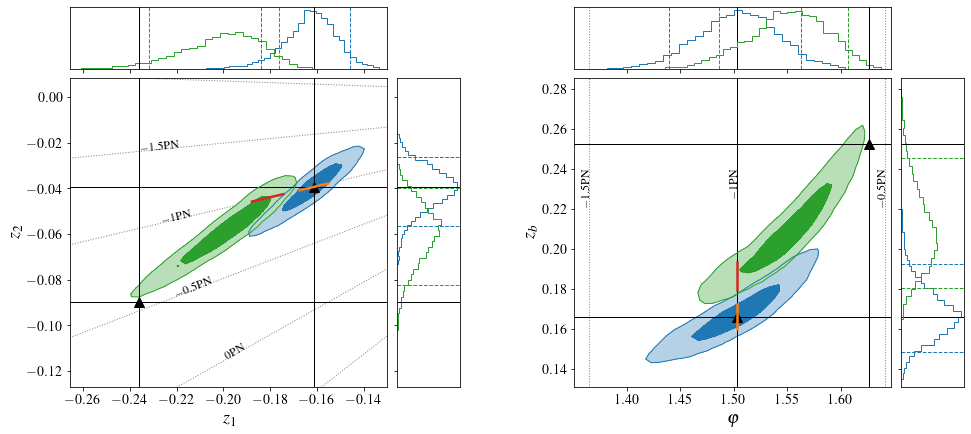

In [53]:
# from utils.corner2d_new import (
#     CornerZ12, CornerZSpectral
# )

# theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
# root_posteriors = "../data/bilby_results/posteriors/"
# root_injections = "../data/bilby_results/injections/"

# plt.style.use('publication.mplstyle')
# fig = plt.figure(figsize=(
#         utils.TEXT_WIDTH_PRD_DOUBLE*2,
#         utils.TEXT_WIDTH_PRD_DOUBLE))
# subfigs = fig.subfigures(1, 2)

# cp0 = CornerZ12(
#         subfigs[0], zmax=1., 
#         grid_indices=theory_angles['b'].values,
#         grid_angles=theory_angles['z_theta'].values)
# cp1 = CornerZSpectral(
#         subfigs[1], 
#         grid_indices=theory_angles['b'].values,
#         grid_angles=theory_angles['z_ang'].values)


# run_name = "mtot15_edgb_sqrta2p5"
# post = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
# post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_bn7.csv"), index_col=0)
# with open(os.path.join(root_injections, run_name+"_bn7.json"), 'r') as f:
#     inj = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
# cp0.plot(post['z_1'].values, post['z_2'].values,
#          x_truth=inj['z_1'], y_truth=inj['z_2'],
#          x_range=0.995, y_range=0.995, bins=30, 
#          color='C0', truth_marker='^', truth_markersize=10)
# cp1.plot(post['z_ang'].values, post['z_bilat'].values,
#          x_truth=inj['z_ang'], y_truth=inj['z_bilat'],
#          x_range=0.995, y_range=0.995, bins=30, 
#          color='C0', truth_marker='^', truth_markersize=10)
# cp0.add_ppe_results(
#         [-7], [np.quantile(post_ppe['z_bilat'].values, [0.05,0.95])], 
#         color='C1', linewidth=2.5*plt.rcParams['lines.linewidth'])
# cp1.add_ppe_results(
#         [-7], [np.quantile(post_ppe['z_bilat'].values, [0.05,0.95])], 
#         color='C1', linewidth=2.5*plt.rcParams['lines.linewidth'])

# run_name = "mtot15_edgb_sqrta2p5_nnlo"
# post = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
# post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_bn7.csv"), index_col=0)
# with open(os.path.join(root_injections, run_name+"_bn7.json"), 'r') as f:
#     inj = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
# cp0.plot(post['z_1'].values, post['z_2'].values,
#          x_truth=inj['z_1'], y_truth=inj['z_2'],
#          x_range=0.995, y_range=0.995, bins=30, 
#          color='C2', truth_marker='^', truth_markersize=10)
# cp1.plot(post['z_ang'].values, post['z_bilat'].values,
#          x_truth=inj['z_ang'], y_truth=inj['z_bilat'],
#          x_range=0.995, y_range=0.995, bins=30, 
#          color='C2', truth_marker='^', truth_markersize=10)
# cp0.add_ppe_results(
#         [-7], [np.quantile(post_ppe['z_bilat'].values, [0.05,0.95])], 
#         color='C3', linewidth=2.5*plt.rcParams['lines.linewidth'])
# cp1.add_ppe_results(
#         [-7], [np.quantile(post_ppe['z_bilat'].values, [0.05,0.95])], 
#         color='C3', linewidth=2.5*plt.rcParams['lines.linewidth'])
# cp1.add_ppe_grid([-8, -7, -6], zorder=0)
    
# cp0.rescale_axes()
# cp0.add_ppe_grid(zorder=0)
# # cp.add_shade()
# cp0.add_ppe_annotations([-8, -7, -6, -5], anchors=0.22, fontsize=plt.rcParams['legend.fontsize'])

# cp1.rescale_axes()
# cp1.add_ppe_annotations([-8, -7, -6], anchors=0.24, fontsize=plt.rcParams['legend.fontsize'])
# # cp1.set_xlim(1.32, 1.68)

# # cp.set_xlim(-1,1)
# # cp.set_xlim(-1,1)
# # post = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
# # plot_corner2d(
# #         post['z_1'].values, post['z_2'].values,
# #         x_range=0.995, y_range=0.995, bins=30,
# #         x_truth=inj['z_1'], y_truth=inj['z_2'],
# #         color='C0', truth_color='black',
# #         truth_marker='^', truth_marker_size=100,
# #         fig=sf, initialize_fig=True, finalize_fig=False, 
# #         subplots_ratio=5., subplots_space=0.05)

In [2]:
from utils.corner2d_new import Corner2D, CornerZ12, CornerZSpectral, get_lines_for_legend


def plot_z12(
        inj_full, post_full_npe, post_full_ppe,
        inj_lead, post_lead_npe, post_lead_ppe, 
        theory_angles, ppe_annotation_indices=[], ppe_annotation_anchors=0.,
        z1_range_full_npe=0.995, z2_range_full_npe=0.995,
        z1_range_lead_npe=0.995, z2_range_lead_npe=0.995,
        full_npe_color='C0', full_ppe_color='C1',
        lead_npe_color='C2', lead_ppe_color='C3',
        full_marker='^', lead_marker='v',
        fig=None):
    
    cp = CornerZ12(
            fig=fig, 
            grid_indices=theory_angles['b'].values, 
            grid_angles=theory_angles['z_theta'].values)
    cp.plot(post_full_npe['z_1'].values, post_full_npe['z_2'].values, 
            x_range=z1_range_full_npe, y_range=z2_range_full_npe, color=full_npe_color)
#     cp.plot(post_lead_npe['z_1'].values, post_lead_npe['z_2'].values, 
#             x_range=z1_range_lead_npe, y_range=z2_range_lead_npe, color=lead_npe_color)
#     cp.mark(inj_full['z_1'], inj_full['z_2'], color='black',
#             marker=full_marker, markersize=3.*plt.rcParams['lines.markersize'])
#     cp.mark(inj_lead['z_1'], inj_lead['z_2'], color='black',
#             marker=lead_marker, markersize=3.*plt.rcParams['lines.markersize'])
    cp.axes[2].plot(inj_full['z_1'], inj_full['z_2'], color='black',
                    marker=full_marker, markersize=3.*plt.rcParams['lines.markersize'])
    cp.axes[2].plot(inj_lead['z_1'], inj_lead['z_2'], color='black',
                    marker=lead_marker, markersize=3.*plt.rcParams['lines.markersize'])
    cp.add_ppe_results(
            [-7], [np.quantile(post_full_ppe['z_bilat'].values, [0.05,0.95])], 
            color=full_ppe_color, linewidth=2.5*plt.rcParams['lines.linewidth'], zorder=2)
#     cp.add_ppe_results(
#             [-7], [np.quantile(post_lead_ppe['z_bilat'].values, [0.05,0.95])], 
#             color=lead_ppe_color, linewidth=2.5*plt.rcParams['lines.linewidth'], zorder=2)
    cp.rescale_axes()
    
    cp.mark(0., 0., color='black', 
            marker=None, linestyle='dashdot')
    cp.add_shade(color='lightgray', zorder=2)
    cp.add_ppe_grid(color='gray', zorder=1)
    cp.add_ppe_annotations(
            ppe_annotation_indices, ppe_annotation_anchors,
            fontsize=plt.rcParams['legend.fontsize'])
    
    return cp


def plot_zspectral(
        inj_full, post_full_npe, post_full_ppe,
        inj_lead, post_lead_npe, post_lead_ppe, 
        theory_angles, ppe_annotation_indices=[], ppe_annotation_anchors=0.,
        za_range_full_npe=0.995, zb_range_full_npe=0.995,
        za_range_lead_npe=0.995, zb_range_lead_npe=0.995,
        full_npe_color='C0', full_ppe_color='C1',
        lead_npe_color='C2', lead_ppe_color='C3',
        full_marker='^', lead_marker='v',
        fig=None):
    
    cp = CornerZSpectral(
            fig=fig, 
            grid_indices=theory_angles['b'].values, 
            grid_angles=theory_angles['z_ang'].values)
    cp.plot(post_full_npe['z_ang'].values, post_full_npe['z_bilat'].values, 
            x_range=za_range_full_npe, y_range=zb_range_full_npe, color=full_npe_color)
#     cp.plot(post_lead_npe['z_ang'].values, post_lead_npe['z_bilat'].values, 
#             x_range=za_range_lead_npe, y_range=zb_range_lead_npe, color=lead_npe_color)
#     cp.mark(inj_full['z_ang'], inj_full['z_bilat'], color='black',
#             marker=full_marker, markersize=3.*plt.rcParams['lines.markersize'])
#     cp.mark(inj_lead['z_ang'], inj_lead['z_bilat'], color='black',
#             marker=lead_marker, markersize=3.*plt.rcParams['lines.markersize'])
    cp.axes[2].plot(inj_full['z_ang'], inj_full['z_bilat'], color='black',
                    marker=full_marker, markersize=3.*plt.rcParams['lines.markersize'])
    cp.axes[2].plot(inj_lead['z_ang'], inj_lead['z_bilat'], color='black',
                    marker=lead_marker, markersize=3.*plt.rcParams['lines.markersize'])
    cp.add_ppe_results(
            [-7], [np.quantile(post_full_ppe['z_bilat'].values, [0.05,0.95])], 
            color=full_ppe_color, linewidth=1.5*plt.rcParams['lines.linewidth'], zorder=2)
#     cp.add_ppe_results(
#             [-7], [np.quantile(post_lead_ppe['z_bilat'].values, [0.05,0.95])], 
#             color=lead_ppe_color, linewidth=2.5*plt.rcParams['lines.linewidth'], zorder=2)
    cp.rescale_axes()
    
    cp.mark(0., 0., color='black', 
            marker=None, linestyle='dashdot')
    cp.add_ppe_grid(color='gray', zorder=1)
    cp.add_ppe_annotations(
            ppe_annotation_indices, ppe_annotation_anchors,
            fontsize=plt.rcParams['legend.fontsize'])
    
    return cp


def plot_masses(
        inj, 
        post_full_npe, post_full_ppe,
        post_lead_npe, post_lead_ppe, 
        mc_range_full_npe=0.995, q_range_full_npe=0.995,
        mc_range_lead_npe=0.995, q_range_lead_npe=0.995,
        mc_range_full_ppe=0.995, q_range_full_ppe=0.995,
        mc_range_lead_ppe=0.995, q_range_lead_ppe=0.995,
        full_npe_color='C0', full_ppe_color='C1',
        lead_npe_color='C2', lead_ppe_color='C3',
        fig=None):
    
    cp = Corner2D(fig=fig)
    cp.plot(post_full_npe['chirp_mass'].values, post_full_npe['mass_ratio'].values, 
            x_range=mc_range_full_npe, y_range=q_range_full_npe, color=full_npe_color)
#     cp.plot(post_lead_npe['chirp_mass'].values, post_lead_npe['mass_ratio'].values, 
#             x_range=mc_range_lead_npe, y_range=q_range_lead_npe, color=lead_npe_color)
    cp.plot(post_full_ppe['chirp_mass'].values, post_full_ppe['mass_ratio'].values, 
            x_range=mc_range_full_npe, y_range=q_range_full_npe, color=full_ppe_color)
#     cp.plot(post_lead_ppe['chirp_mass'].values, post_lead_ppe['mass_ratio'].values, 
#             x_range=mc_range_full_npe, y_range=q_range_full_npe, color=lead_ppe_color)
    cp.mark(inj['chirp_mass'], inj['mass_ratio'], color='black',
            marker='s', markersize=2.*plt.rcParams['lines.markersize'])
    cp.rescale_axes()
    cp.set_ylim(None, 1.)
    cp.align_axes()
    cp.axes[2].set_xlabel(r'$\mathcal{M}\,/\,M_\odot$')
    cp.axes[2].set_ylabel(r'$q$')
    
    return cp


def plot_reconstruction(df, fig=None, ylim=None, 
                        npe_color='C0', ppe_color='C1', 
                        weight_cmap=plt.cm.gray, weight_alpha=1.):
    
    if fig is None:
        fig = plt.figure()
#     fig.subplots(2, 2, width_ratios=[5.,1.], height_ratios=[1.,5.])
#     fig.subplots_adjust(wspace=0.05, hspace=0.05)
    fig.subplots()
#     ref_height = 0.8
#     ref_space = ref_height * 0.05
#     main_height = ref_height * 0.95 * 5. / 6
#     cbar_pad = ref_space / main_height
#     cbar_height = 0.15 * main_height
#     full_height = main_height + ref_space + cbar_height
#     fig.subplots_adjust(left=0.15, right=0.15+full_height, bottom=0.15, top=0.15+main_height)
#     print(full_height)
    
    lwfac = 2.
    ax = fig.axes[0]
    ax.plot(df['freqs'], df['phi_npe_map']-df['phi_inj'], 
            color=npe_color, linewidth=lwfac*plt.rcParams['lines.linewidth'],
            label='npE mapping')
    ax.plot(df['freqs'], df['phi_npe_post']-df['phi_inj'], 
            color=npe_color, linestyle='dashed', linewidth=lwfac*plt.rcParams['lines.linewidth'],
            label='npE posterior')
    ax.plot(df['freqs'], df['phi_ppe_map']-df['phi_inj'], 
            color=ppe_color, linewidth=lwfac*plt.rcParams['lines.linewidth'], 
            label='ppE mapping')
    ax.plot(df['freqs'], df['phi_ppe_post']-df['phi_inj'], 
            color=ppe_color, linestyle='dashed', linewidth=lwfac*plt.rcParams['lines.linewidth'],
            label='ppE posterior')
    ax.autoscale(axis='x', tight=True)
    ax.set_ylim(ylim)
    ylim = ax.get_ylim()

    w = df['ampl_over_asd']**2 * df['freqs']
    w = w / np.max(w)
    w = np.vstack([w, w])
    x, y = np.meshgrid(df['freqs'], ylim)
    cax = ax.pcolormesh(x, y, w, vmin=0., vmax=1., cmap=weight_cmap, alpha=weight_alpha)
    cbar = plt.colorbar(cax, ax=ax, fraction=0.1, pad=0.03, label='SNR weight')

#     ax.grid()
    ax.set_xscale('log')
    ax.set_xlabel(r'$f\,/\,\mathrm{Hz}$')
    ax.set_ylabel(r'$\Phi-\Phi_\mathrm{inj}$')
    ax.axhline(0., color='black')
    ax.legend()
    
    return fig

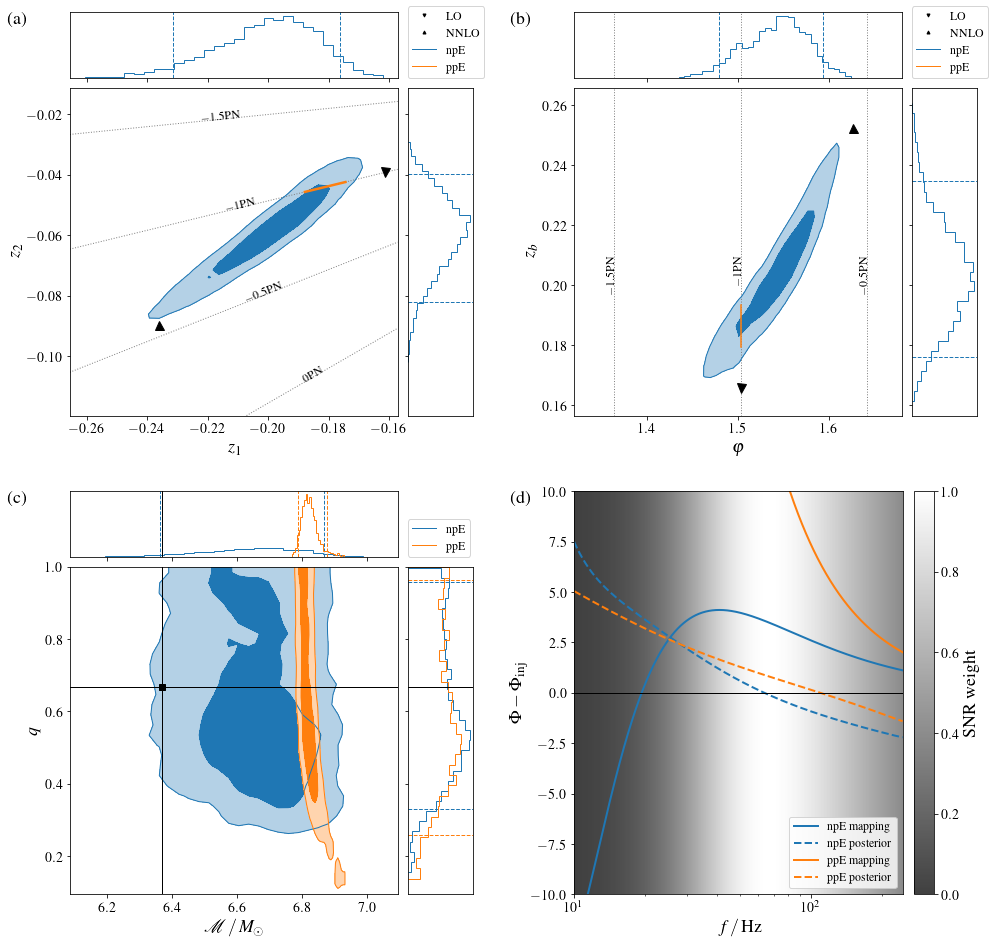

In [3]:
plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE*2,
        utils.TEXT_WIDTH_PRD_DOUBLE*2))
subfigs = fig.subfigures(2, 2)

# labels = ['inj = full theory, rec = NPE', 'inj = full theory, rec = PPE',
#           'inj = leading effect, rec = NPE', 'inj = leading effect, rec = PPE']
# lines = get_lines_for_legend(colors=['C0', 'C1', 'C2', 'C3'])
# labels_extra = ['full theory', 'leading effect']
# lines_extra = get_lines_for_legend(colors=['black', 'black'], markers=['^', 'v'])
labels = ['npE', 'ppE']
lines = get_lines_for_legend(colors=['C0', 'C1'])
labels_extra = ['LO', 'NNLO']
lines_extra = get_lines_for_legend(colors=['black', 'black'], markers=['v', '^'], linestyles=['', ''])

root_posteriors = "../data/bilby_results/posteriors/"
root_injections = "../data/bilby_results/injections/"
theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
phase_recon = pd.read_csv("../data/phase_reconstruction_edgb_sqrta2p5_nnlo.csv", index_col=0)

run_name = "mtot15_edgb_sqrta2p5_nnlo"
post_full_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_bn7.csv"), index_col=0)
with open(os.path.join(root_injections, run_name+"_bn7.json"), 'r') as f:
    inj_full = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
run_name = "mtot15_edgb_sqrta2p5"
post_lead_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_bn7.csv"), index_col=0)
with open(os.path.join(root_injections, run_name+"_bn7.json"), 'r') as f:
    inj_lead = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
    
run_name = "mtot15_edgb_sqrta2p5_nnlo"
post_full_npe = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
run_name = "mtot15_edgb_sqrta2p5"
post_lead_npe = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
cp = plot_z12(
        inj_full, post_full_npe, post_full_ppe, 
        inj_lead, post_lead_npe, post_lead_ppe, 
        theory_angles=theory_angles, 
        ppe_annotation_indices=[-8, -7, -6, -5], 
        ppe_annotation_anchors=0.21,
        fig=subfigs[0,0])
# cp.axes[2].legend(lines+lines_extra, labels+labels_extra, loc='upper left')
cp.axes[1].legend(lines_extra+lines, labels_extra+labels, loc=(0,0))

run_name = "mtot15_edgb_sqrta2p5_nnlo"
post_full_npe = pd.read_csv(os.path.join(root_posteriors, run_name+"_zpolar.csv"), index_col=0)
run_name = "mtot15_edgb_sqrta2p5"
post_lead_npe = pd.read_csv(os.path.join(root_posteriors, run_name+"_zpolar.csv"), index_col=0)
cp = plot_zspectral(
        inj_full, post_full_npe, post_full_ppe, 
        inj_lead, post_lead_npe, post_lead_ppe, 
        theory_angles=theory_angles, 
        ppe_annotation_indices=[-8, -7, -6], 
        ppe_annotation_anchors=0.21,
        fig=subfigs[0,1])
cp.set_xlim(1.32, 1.68)
cp.align_axes()
# cp.axes[2].legend(lines+lines_extra, labels+labels_extra, loc='upper left')
cp.axes[1].legend(lines_extra+lines, labels_extra+labels, loc=(0,0))

run_name = "mtot15_edgb_sqrta2p5_nnlo"
post_full_npe = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
run_name = "mtot15_edgb_sqrta2p5"
post_lead_npe = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
cp = plot_masses(
        inj_full, 
        post_full_npe, post_full_ppe, 
        post_lead_npe, post_lead_ppe, 
        mc_range_lead_npe=0.99,
        fig=subfigs[1,0])
# cp.axes[2].legend(lines, labels, loc='lower left')
cp.axes[1].legend(lines, labels, loc=(0,0))

sf = subfigs[1,1]
plot_reconstruction(phase_recon, ylim=(-10.,10.), weight_alpha=0.75, fig=sf)
# ax, cbar = sf.axes

subfigs[0, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
subfigs[0, 1].subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
subfigs[1, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
subfigs[1, 1].subplots_adjust(left=0.15, right=0.9, bottom=0.15, top=0.95)

axes_to_label = [sf.axes[0] for sf in subfigs.flat]
axes_label_pos = [(-0.13,1.)] * len(axes_to_label)
for i,(ax,pos) in enumerate(zip(axes_to_label, axes_label_pos)):
    axlabel = f'({chr(97+i)})'
    ax.text(pos[0], pos[1], axlabel, 
            transform=ax.transAxes, 
            fontweight='bold', fontsize=18,
            va='top', ha='right')
    
# fig.savefig('../figs/edgb.pdf')

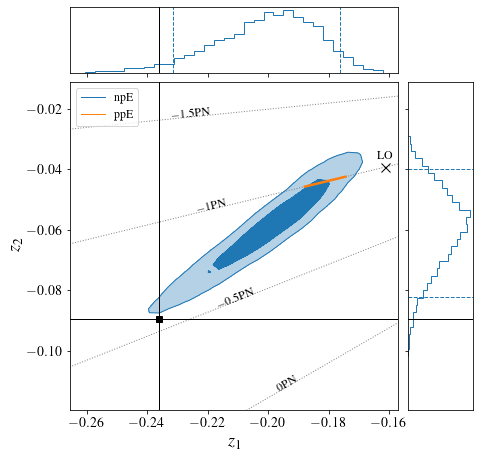

In [3]:
from utils.corner2d_new import Corner2D, CornerZ12, CornerZSpectral, get_lines_for_legend

def plot_z12_for_slides(
        inj_full, post_full_npe, post_full_ppe,
        inj_lead, 
        theory_angles, ppe_annotation_indices=[], ppe_annotation_anchors=0.,
        z1_range_full_npe=0.995, z2_range_full_npe=0.995,
        full_npe_color='C0', full_ppe_color='C1',
        full_marker='s', mark_full=True,
        lead_marker='x', mark_lead=True,
        fig=None):
    
    cp = CornerZ12(
            fig=fig, 
            grid_indices=theory_angles['b'].values, 
            grid_angles=theory_angles['z_theta'].values)
    cp.plot(post_full_npe['z_1'].values, post_full_npe['z_2'].values, 
            x_range=z1_range_full_npe, y_range=z2_range_full_npe, color=full_npe_color)
    if mark_full:
        cp.mark(inj_full['z_1'], inj_full['z_2'], color='black',
                marker=full_marker, markersize=2.*plt.rcParams['lines.markersize'])
    if mark_lead:
        cp.axes[2].plot(
                inj_lead['z_1'], inj_lead['z_2'], color='black',
                marker=lead_marker, markersize=3.*plt.rcParams['lines.markersize'])
    cp.add_ppe_results(
            [-7], [np.quantile(post_full_ppe['z_bilat'].values, [0.05,0.95])], 
            color=full_ppe_color, linewidth=2.5*plt.rcParams['lines.linewidth'], zorder=2)
    cp.rescale_axes()
    
    cp.add_shade(color='lightgray', zorder=2)
    cp.add_ppe_grid(color='gray', zorder=1)
    cp.add_ppe_annotations(
            ppe_annotation_indices, ppe_annotation_anchors,
            fontsize=plt.rcParams['legend.fontsize'])
    
    return cp


plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE,
        utils.TEXT_WIDTH_PRD_DOUBLE))

labels = ['npE', 'ppE']
lines = get_lines_for_legend(colors=['C0', 'C1'])
# labels_extra = ['full theory', 'leading effect']
# lines_extra = get_lines_for_legend(colors=['black', 'black'], markers=['^', 'v'])

root_posteriors = "../data/bilby_results/posteriors/"
root_injections = "../data/bilby_results/injections/"
theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
phase_recon = pd.read_csv("../data/phase_reconstruction_edgb_sqrta2p5_nnlo.csv", index_col=0)

run_name = "mtot15_edgb_sqrta2p5_nnlo"
post_full_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_bn7.csv"), index_col=0)
with open(os.path.join(root_injections, run_name+"_bn7.json"), 'r') as f:
    inj_full = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
run_name = "mtot15_edgb_sqrta2p5"
post_lead_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_bn7.csv"), index_col=0)
with open(os.path.join(root_injections, run_name+"_bn7.json"), 'r') as f:
    inj_lead = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
    
run_name = "mtot15_edgb_sqrta2p5_nnlo"
post_full_npe = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
run_name = "mtot15_edgb_sqrta2p5"
post_lead_npe = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
cp = plot_z12_for_slides(
        inj_full, post_full_npe, post_full_ppe, 
        inj_lead, mark_full='s', mark_lead='x',
        theory_angles=theory_angles, 
        ppe_annotation_indices=[-8, -7, -6, -5], 
        ppe_annotation_anchors=0.22,
        fig=fig)
cp.axes[2].text(inj_lead['z_1'], inj_lead['z_2']+0.002, 'LO', 
                ha='center', va='bottom', fontsize=plt.rcParams['legend.fontsize'])
cp.axes[2].legend(lines, labels, loc='upper left')

fig.subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)

fig.savefig('../figs/slides/edgb_full_z12.pdf')

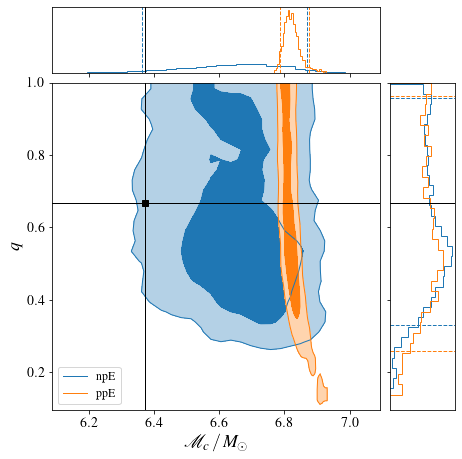

In [4]:
def plot_masses_for_slides(
        inj, 
        post_full_npe, post_full_ppe,
#         post_lead_npe, post_lead_ppe, 
        mc_range_full_npe=0.995, q_range_full_npe=0.995,
#         mc_range_lead_npe=0.995, q_range_lead_npe=0.995,
        mc_range_full_ppe=0.995, q_range_full_ppe=0.995,
#         mc_range_lead_ppe=0.995, q_range_lead_ppe=0.995,
        full_npe_color='C0', full_ppe_color='C1',
#         lead_npe_color='C2', lead_ppe_color='C3',
        fig=None):
    
    cp = Corner2D(fig=fig)
    cp.plot(post_full_npe['chirp_mass'].values, post_full_npe['mass_ratio'].values, 
            x_range=mc_range_full_npe, y_range=q_range_full_npe, color=full_npe_color)
#     cp.plot(post_lead_npe['chirp_mass'].values, post_lead_npe['mass_ratio'].values, 
#             x_range=mc_range_lead_npe, y_range=q_range_lead_npe, color=lead_npe_color)
    cp.plot(post_full_ppe['chirp_mass'].values, post_full_ppe['mass_ratio'].values, 
            x_range=mc_range_full_npe, y_range=q_range_full_npe, color=full_ppe_color)
#     cp.plot(post_lead_ppe['chirp_mass'].values, post_lead_ppe['mass_ratio'].values, 
#             x_range=mc_range_full_npe, y_range=q_range_full_npe, color=lead_ppe_color)
    cp.mark(inj['chirp_mass'], inj['mass_ratio'], color='black',
            marker='s', markersize=2.*plt.rcParams['lines.markersize'])
    cp.rescale_axes()
    cp.set_ylim(None, 1.)
    cp.align_axes()
    cp.axes[2].set_xlabel(r'$\mathcal{M}_c\,/\,M_\odot$')
    cp.axes[2].set_ylabel(r'$q$')
    
    return cp

plt.style.use('publication.mplstyle')
fig = plt.figure(figsize=(
        utils.TEXT_WIDTH_PRD_DOUBLE,
        utils.TEXT_WIDTH_PRD_DOUBLE))

labels = ['npE', 'ppE']
lines = get_lines_for_legend(colors=['C0', 'C1'])

root_posteriors = "../data/bilby_results/posteriors/"
root_injections = "../data/bilby_results/injections/"
theory_angles = pd.read_csv("../data/theory_angles.csv", index_col=0)
phase_recon = pd.read_csv("../data/phase_reconstruction_edgb_sqrta2p5_nnlo.csv", index_col=0)

run_name = "mtot15_edgb_sqrta2p5_nnlo"
post_full_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_bn7.csv"), index_col=0)
with open(os.path.join(root_injections, run_name+"_bn7.json"), 'r') as f:
    inj_full = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
run_name = "mtot15_edgb_sqrta2p5"
post_lead_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_bn7.csv"), index_col=0)
with open(os.path.join(root_injections, run_name+"_bn7.json"), 'r') as f:
    inj_lead = bilby.utils.io.recursively_decode_bilby_json(json.load(f))
    
run_name = "mtot15_edgb_sqrta2p5_nnlo"
post_full_npe = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
run_name = "mtot15_edgb_sqrta2p5"
post_lead_npe = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
cp = plot_masses_for_slides(
        inj_full, 
        post_full_npe, post_full_ppe, 
#         post_lead_npe, post_lead_ppe, 
#         mc_range_lead_npe=0.99,
        fig=fig)
cp.axes[2].legend(lines, labels, loc='lower left')

fig.subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
    
fig.savefig('../figs/slides/edgb_full_z12_masses.pdf')

# Add plots

(c) Phase $\Phi-\Phi^\mathrm{inj}_\mathrm{GR}$ and (d) phase error $\Phi-\Phi^\mathrm{inj}$ vs frequency, 10Hz to inspiral cutoff

1. \[black\] EdGB NNLO phase
2. \[red dashed\] PPE mapping (taking only LO, up-pointing triangle above)
3. \[green dashed\] NPE mapping (down-pointing triangle above)
4. \[red\] PPE posterior peak/median (from red above)
5. \[green\] NPE posterior peak/median (from green above)

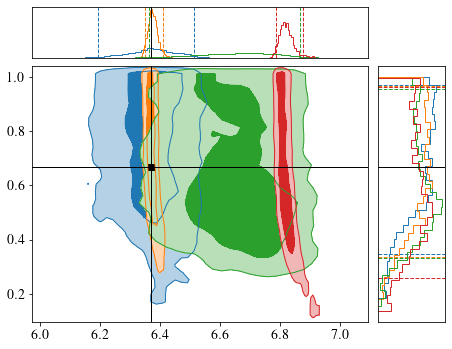

In [101]:
run_name = "mtot15_edgb_sqrta2p5"
post = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_bn7.csv"), index_col=0)
# plot_hist(post['chirp_mass'].values, color='C0', truth=inj['chirp_mass'])
# plot_hist(post_ppe['chirp_mass'].values, color='C1')
fig = plot_corner2d(
        post['chirp_mass'].values, post['mass_ratio'].values,
        x_range=0.995, y_range=0.995, bins=30, color='C0', 
        initialize_fig=True, finalize_fig=False,
        subplots_ratio=5, subplots_space=0.05)
plot_corner2d(
        post_ppe['chirp_mass'].values, post_ppe['mass_ratio'].values,
        x_range=0.995, y_range=0.995, bins=30, color='C1', 
        fig=fig, initialize_fig=False, finalize_fig=False)

run_name = "mtot15_edgb_sqrta2p5_nnlo"
post = pd.read_csv(os.path.join(root_posteriors, run_name+"_z12.csv"), index_col=0)
post_ppe = pd.read_csv(os.path.join(root_posteriors, run_name+"_bn7.csv"), index_col=0)
plot_corner2d(
        post['chirp_mass'].values, post['mass_ratio'].values,
        x_range=0.995, y_range=0.995, bins=30, color='C2', 
        fig=fig, initialize_fig=False, finalize_fig=False)
plot_corner2d(
        post_ppe['chirp_mass'].values, post_ppe['mass_ratio'].values,
        x_range=0.995, y_range=0.995, bins=30, color='C3', truth_color='black', 
        x_truth=inj['chirp_mass'], y_truth=inj['mass_ratio'],
        fig=fig, initialize_fig=False, finalize_fig=True)

plt.show()